In [1]:
# !pip install torch torchvision torchaudio
# !pip install easyocr

In [2]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [3]:
IMAGE_PATH = 'test.png'

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


'68R3U'

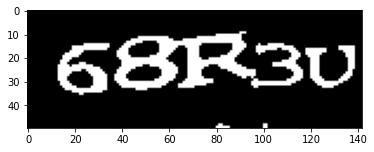

In [4]:
img = cv2.imread(IMAGE_PATH)

#inverted image
img = cv2.bitwise_not(img)

#Rescaling image
# img = cv2.resize(img,(1000,500))

#Binarization image
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_,img = cv2.threshold(img,100,100,cv2.THRESH_BINARY)

#Noise Removal
# img = cv2.fastNlMeansDenoisingColored(img, None, 15, 15, 7, 20) 
kernel = np.ones((1,1),np.uint8)
img = cv2.dilate(img,kernel,iterations = 1)
img = cv2.erode(img,kernel,iterations = 1)
img = cv2.morphologyEx(img,cv2.MORPH_CLOSE,kernel)
img = cv2.medianBlur(img,3)

#Dilation & Eration
img = cv2.bitwise_not(img)
img = cv2.erode(img,kernel,iterations = 1)
img = cv2.bitwise_not(img)

plt.imshow(img,cmap='gray')

reader = easyocr.Reader(['en'])
result = reader.recognize(img)
result[0][1].replace(' ','')

In [5]:
# img = cv2.imread(IMAGE_PATH)
# img = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
# # img = cv2.resize(img,(2000,500)) #resize image dengan panjang 500 dan tinggi/lebar 100\n"

# #tampilkan img
# plt.imshow(img, cmap="gray")

# reader = easyocr.Reader(['en'])
# result = reader.recognize(img)
# result

In [6]:
# img = cv2.imread(IMAGE_PATH)
# img = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# img = cv2.resize(img,(2000,500)) #resize image dengan panjang 500 dan tinggi/lebar 100\n"

# plt.imshow(img, 'gray')

# reader = easyocr.Reader(['en'])
# result = reader.recognize(img)
# result